<a href="https://colab.research.google.com/github/whiteevl/machine-learning/blob/main/Proyek_Pertama_Membuat_Model_NLP_dengan_TensorFlowujicoba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [25]:
df = pd.read_csv('imdb_top_1000.csv')
data.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


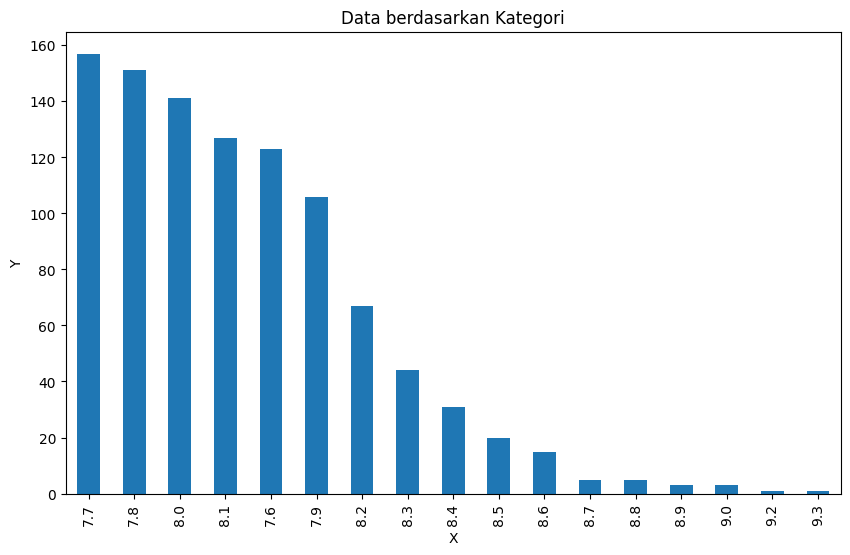

In [28]:
plt.figure(figsize=(10, 6))
df['IMDB_Rating'].value_counts().plot(kind='bar')
plt.title('Data berdasarkan Kategori')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [33]:
label_encoder = LabelEncoder()
df['Certificate'] = label_encoder.fit_transform(df['IMDB_Rating'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['Meta_score'], df['Certificate'], test_size=0.2, random_state=42)


In [44]:
X_train = X_train.fillna('')
X_train = X_train.astype(str)

X_test = X_test.fillna('')
X_test = X_test.astype(str)

vocab_size = 10000
embedding_dim = 100
max_length = 150
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<oov>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [46]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [49]:
history = model.fit(train_padded, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
20/20 [==============================] - 15s 494ms/step - loss: -9.7248 - accuracy: 0.1562 - val_loss: -26.6520 - val_accuracy: 0.1937
Epoch 2/20
20/20 [==============================] - 7s 328ms/step - loss: -37.8090 - accuracy: 0.1547 - val_loss: -57.6095 - val_accuracy: 0.1937
Epoch 3/20
20/20 [==============================] - 9s 432ms/step - loss: -66.2474 - accuracy: 0.1547 - val_loss: -94.2729 - val_accuracy: 0.1937
Epoch 4/20
20/20 [==============================] - 7s 374ms/step - loss: -102.0351 - accuracy: 0.1547 - val_loss: -137.6242 - val_accuracy: 0.1937
Epoch 5/20
20/20 [==============================] - 8s 404ms/step - loss: -148.1257 - accuracy: 0.1547 - val_loss: -189.2604 - val_accuracy: 0.1937
Epoch 6/20
20/20 [==============================] - 9s 436ms/step - loss: -196.5990 - accuracy: 0.1547 - val_loss: -249.1271 - val_accuracy: 0.1937
Epoch 7/20
20/20 [==============================] - 7s 339ms/step - loss: -249.1801 - accuracy: 0.1547 - val_loss: -31

In [50]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

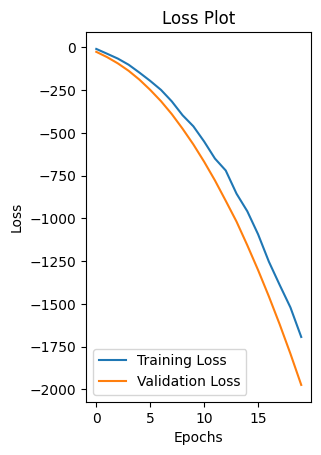

In [51]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

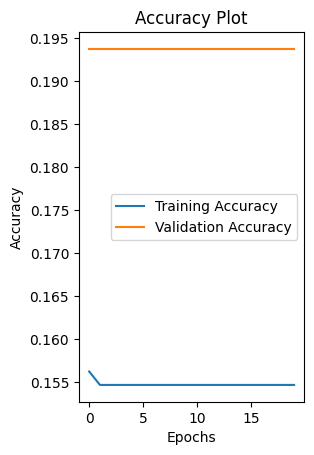

In [52]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [53]:
test_loss, test_accuracy = model.evaluate(test_padded, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

7/7 [==============================] - 2s 89ms/step - loss: -1693.5405 - accuracy: 0.1350
Test Accuracy: 13.50%


In [55]:
# Periksa akurasi pada data pelatihan dan validasi dari history
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Cek apakah akurasi memenuhi syarat minimal
if train_accuracy >= 0.75 and val_accuracy >= 0.75:
    print("Model memenuhi syarat akurasi minimal.")
else:
    print("Model tidak memenuhi syarat akurasi minimal.")


Model tidak memenuhi syarat akurasi minimal.
